In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from streaming.client import RemoteCamera
from roboflow import Roboflow

In [2]:
rf = Roboflow(api_key="Lwoy9YMydW8pVfjPJkxS")
project = rf.workspace().project("bottle-cap-hackathon")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


In [3]:
rc = RemoteCamera("192.168.10.125", 9999)
rc.connect()

In [4]:
frame = rc.get_frame()

rgb_frame = np.repeat(frame[:, :, np.newaxis], 3, axis=2)

predictions = model.predict(rgb_frame).json()['predictions']

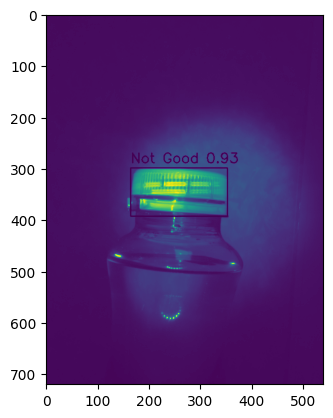

In [5]:
for pred in predictions:
    class_name = pred['class']
    conf = pred['confidence']

    x = int(pred['x'])
    y = int(pred['y'])
    height = int(pred['height'])
    width = int(pred['width'])

    x1 = x - width // 2
    y1 = y - height // 2
    x2 = x + width // 2
    y2 = y + height // 2
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # draw the label
    cv2.putText(frame, f"{class_name} {conf:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    plt.imshow(frame)

In [6]:
rc.disconnect()